In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
# 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 Null Data가 존재합니다. 이를 확인하고, 향후 수정합니다.
# 탐색적 데이터 분석(Exploratory Data Analysis) - 여러 Feature들을 개별적으로 분석하고, 그들 간의 상관관계를 확인합니다.
#                                                다양한 시각화를 통해 insight를 얻습니다.
# Feature Engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 Feature들을 Engineering 합니다.
#                       One-hot encoding, class 나누기, 구간으로 나누기, 텍스트 처리 등을 합니다.
# Model 만들기 - Sklearn을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된
#               문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할수도 있습니다.
# 모델 학습 및 예측 - trainset을 가지고 모델을 학습시킨 후, testset을 가지고 prediction합니다.
# 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다.
#            학습된 모델이 어떤 것을 학습하였는지 확인해봅니다.

## Dataset 확인

In [3]:
dirr = 'C:/Users/rsh15/Desktop/seunghuni/dataset/titanic'
df_train = pd.read_csv(dirr+'/train.csv')
df_test  = pd.read_csv(dirr+'/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()
df_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Null data check

In [8]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col,100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col,100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

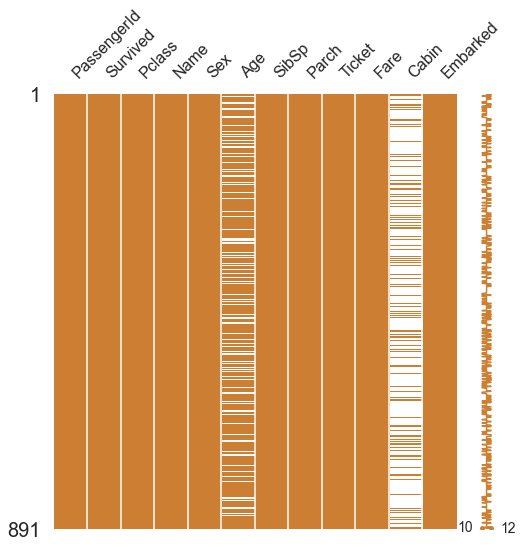

In [11]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8, 0.5, 0.2))

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

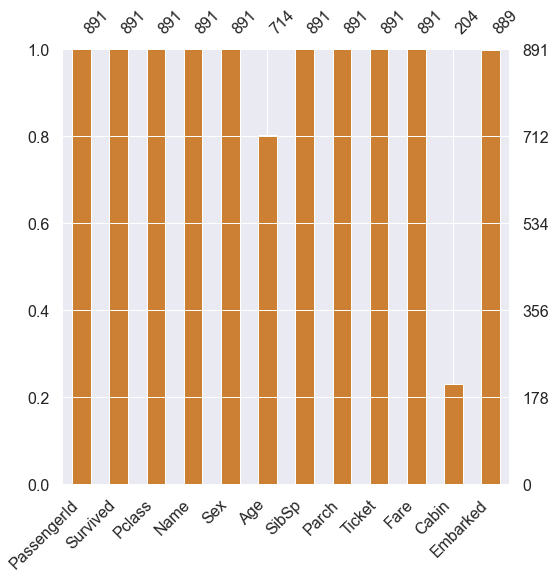

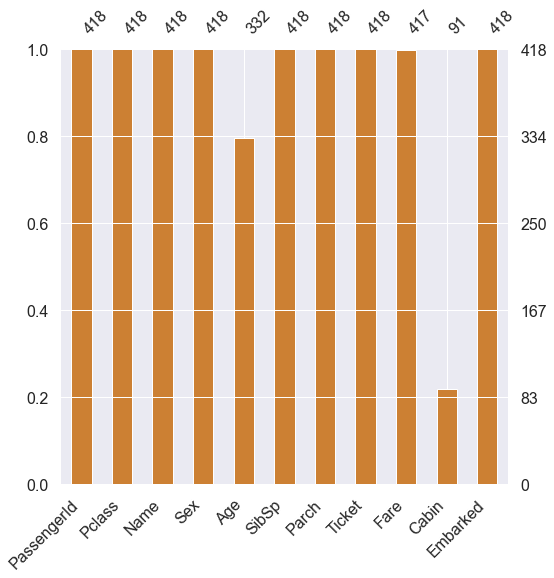

In [14]:
msno.bar(df=df_train,figsize=(8,8),color=(0.8,0.5,0.2))
plt.figure()
msno.bar(df=df_test,figsize=(8,8),color=(0.8,0.5,0.2))

### Target Variable 확인

In [15]:
# target label이 어떤 distribution을 가지고 있는지 확인해봐야 한다.
# 지금 같은 binary classification 문제의 경우에서 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있다.

<AxesSubplot:ylabel='Survived'>

Text(0.5, 1.0, 'Pie plot - Survived')

Text(0, 0.5, '')

<AxesSubplot:xlabel='Survived', ylabel='count'>

Text(0.5, 1.0, 'count plot - survived')

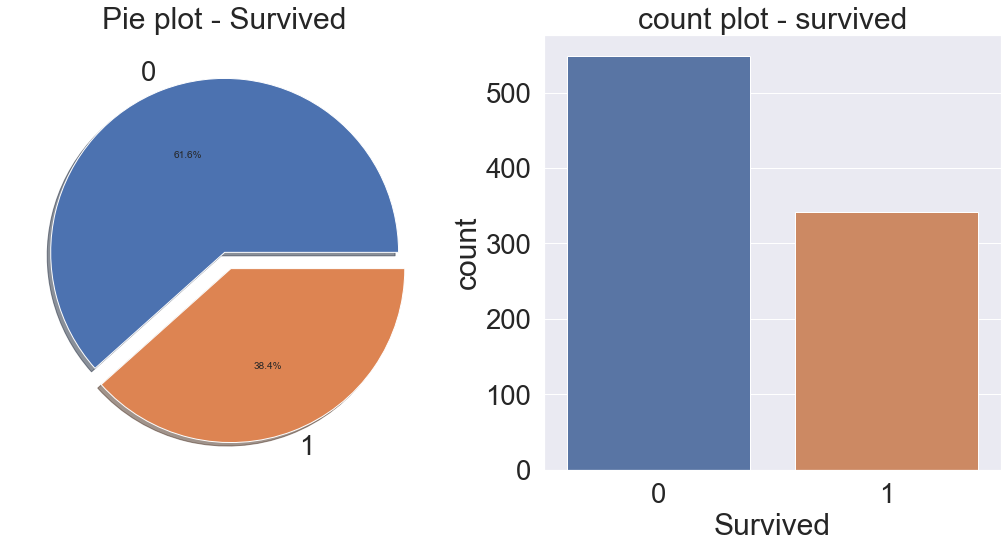

In [17]:
f,ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=df_train, ax=ax[1])
ax[1].set_title('count plot - survived')

In [18]:
# 안타깝게도 죽은 사람이 많다.
# 38.4%가 살아남았다.
# target label의 분포가 제법 균일하다. 불균일한 경우, 예를 들어서 100 중 1이 99, 0이 1개인 경우 만약 모델이 모든것을 1이라고 
# 예측해도 모델의 정확도는 99%이다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없다. 지금 이 문제에서는 상관없는 문제이다.

## Exploratory data analysis

In [19]:
# 데이터는 매우 많다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요하다.
# 시각화 라이브러리는 matplotlib, seaborn, plotly등이 있다. 특정 목적에 맞는 소스코드를 정리해두면
# 필요할때마다 참고하면 편리하게 활용할 수 있다.

### Pclass

In [20]:
# Pclass는 ordinal, 서수형 데이터이다. 카테고리이면서 순서가 있는 데이터타입이다.
# Pclass에 따른 차이는 pandas dataframe의 groupby를 사용하면 쉽게 볼 수 있다. pivot이라는 메소드도 활용할 수 있다.
# Pclass,Survived를 Pclass로 묶은 뒤, 각 Pclass마다 0,1이 count가 되는데, 이를 평균내면 각 Pclass별 생존률을 계산할 수 있다.

In [25]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

Survived                
            sum count      mean
Pclass                         
1           136   216  0.629630
2            87   184  0.472826
3           119   491  0.242363

In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [27]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [28]:
# grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있다.

<AxesSubplot:xlabel='Pclass'>

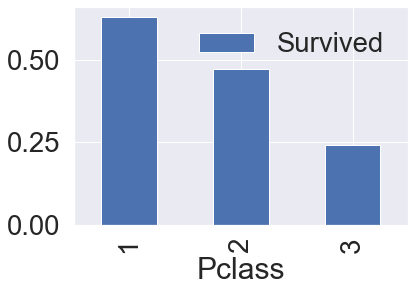

In [29]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(
    by='Survived',ascending=False).plot.bar()

In [30]:
# 보다시피, Pclass가 좋을수록 생존률이 높다는 것을 확인할 수 있다.
# seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해볼 수 있다.

<AxesSubplot:>

Text(0.5, 1.02, 'Number of Passengers by Pclass')

Text(0, 0.5, 'Count')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

Text(0.5, 1.02, 'Pclass: Survived vs Dead')

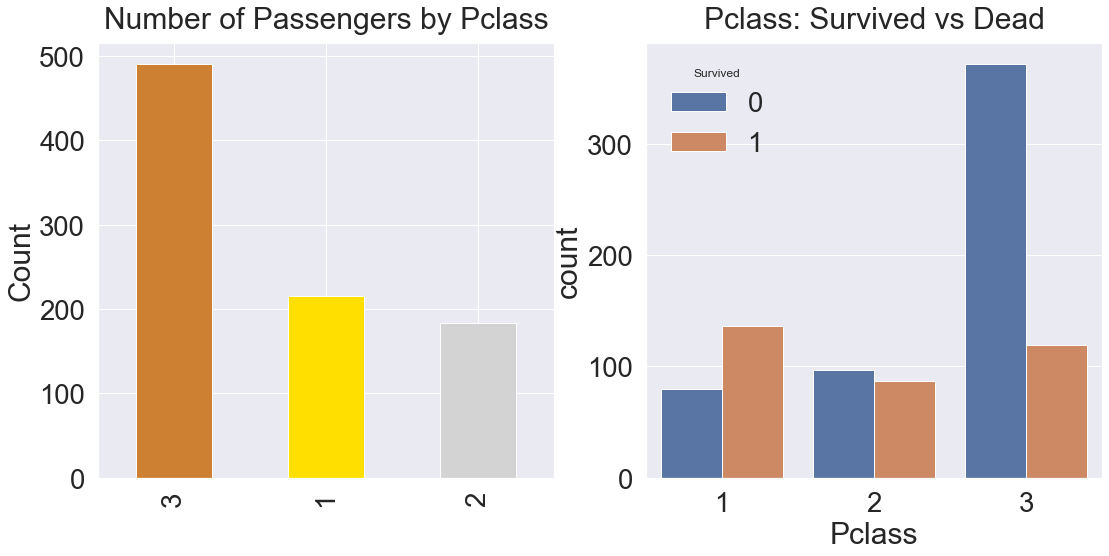

In [32]:
y_position = 1.02
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass',y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead',y=y_position)

In [33]:
# 클래스가 높을수록, 생존 확률이 높은걸 확인할 수 있다.
# Pclass 1,2,3 순서대로 63%, 48%, 25%입니다.
# 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며,
# 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있다. 

### Sex

In [34]:
# 성별 생존률이 어떻게 달라지는지 확인해보고자 한다.
# 마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화해본다.

<AxesSubplot:xlabel='Sex'>

Text(0.5, 1.0, 'Survived vs Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

Text(0.5, 1.0, 'Sex: Survived vs Dead')

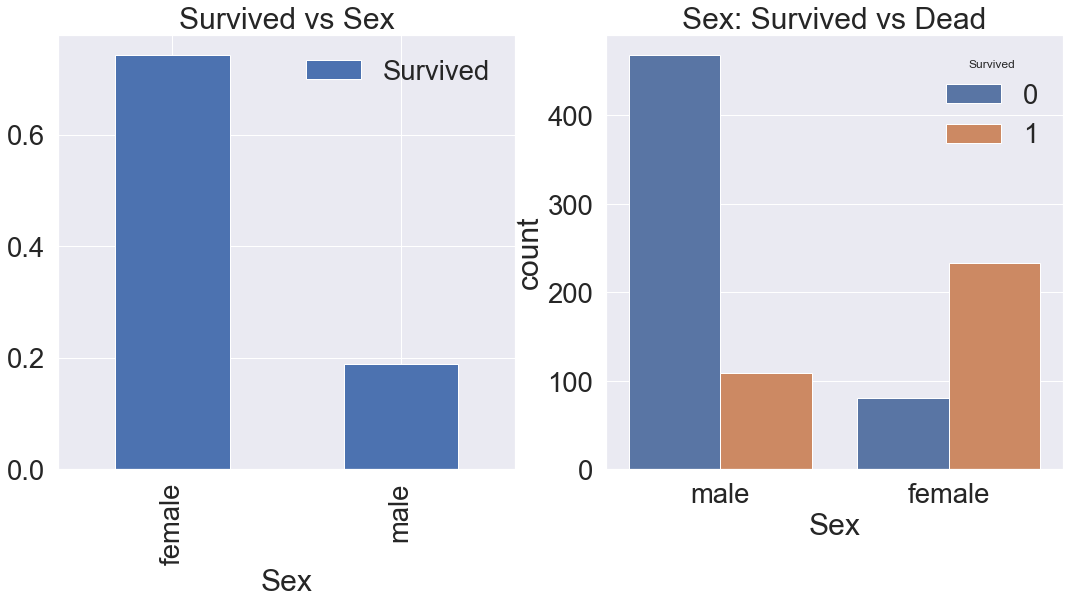

In [37]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

In [38]:
# 보다시피, 여자가 생존할 확률이 높다.

In [39]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [40]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [41]:
# Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 Feature임을 알 수 있다.

### Both Sex and Pclass

In [42]:
# 이번에는 Sex, Pclass 두 가지에 관하여 생존이 어떻게 달라지는지를 확인.
# seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

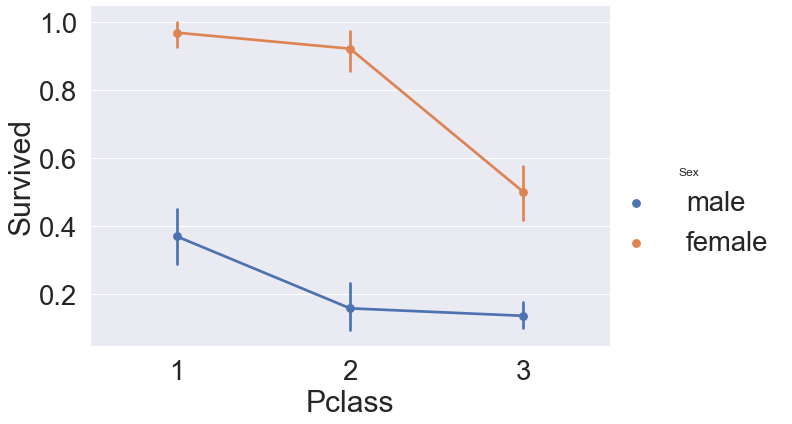

In [43]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

In [44]:
# 모든 클래스에서 female이 살 확률이 male보다 높은 걸 알 수 있다.
# 또한 남,여 상관없이 클래스가 높을수록 생존확률이 높다.
# 위 그래프는 hue 대신 column 옵션을 쓰면 아래와 같아진다.

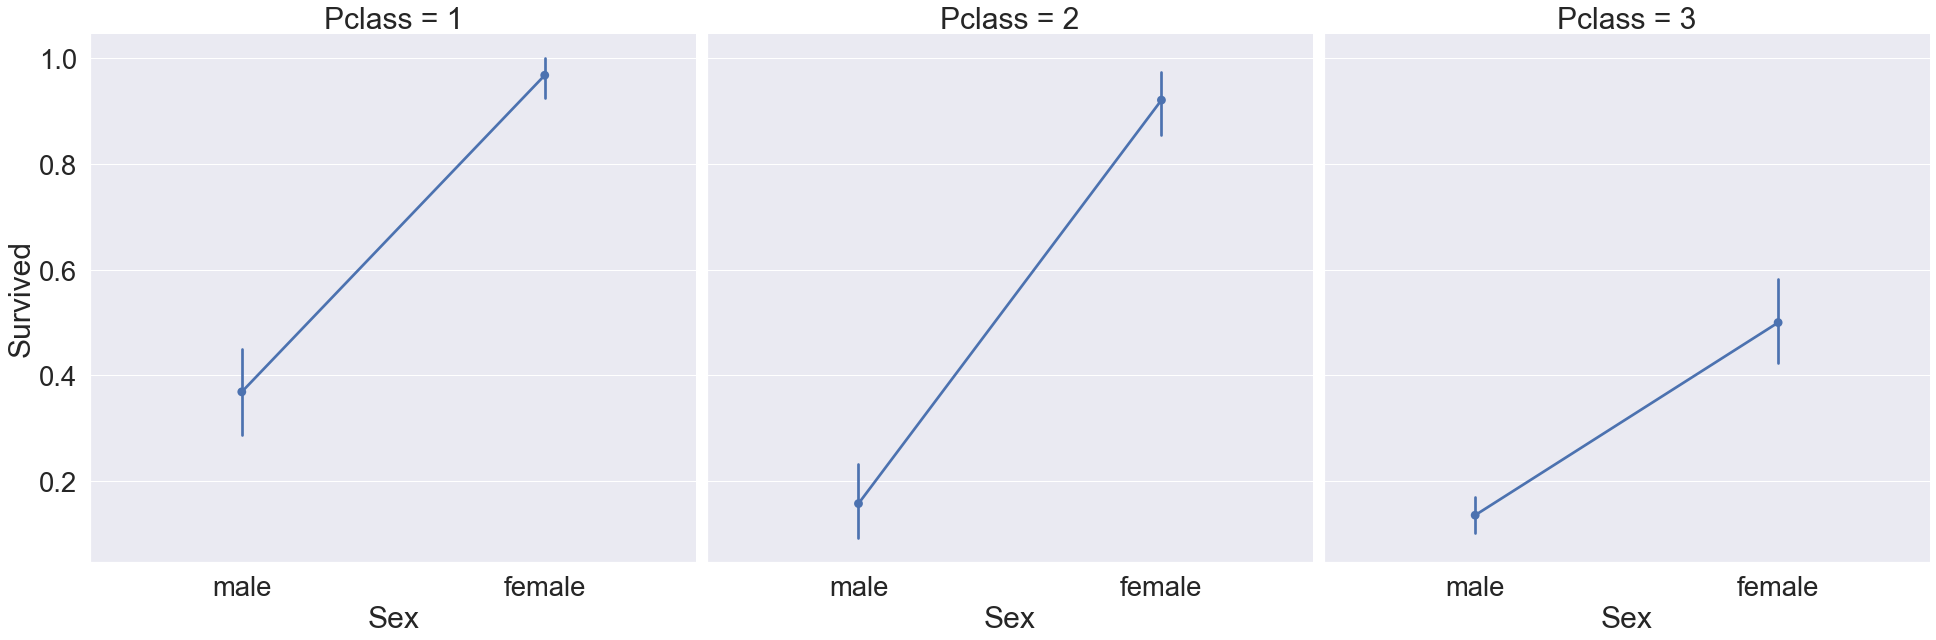

In [45]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,satureation=0.5,size=9,aspect=1)

### Age

In [47]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이      : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균 나이      : 29.7 Years


<AxesSubplot:>

<AxesSubplot:>

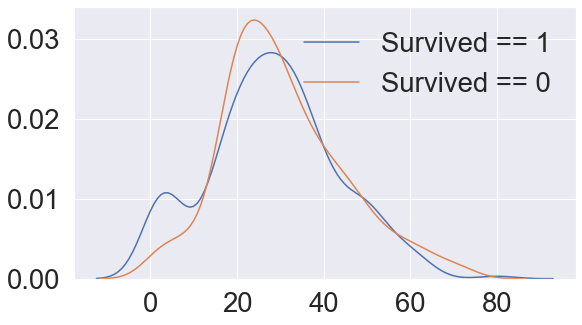

In [48]:
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived == 1','Survived == 0'])

In [49]:
# 생존자 중 나이가 어린 경우가 많다.

<Figure size 576x432 with 0 Axes>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'Age')

Text(0.5, 1.0, 'Age Distribution within classes')

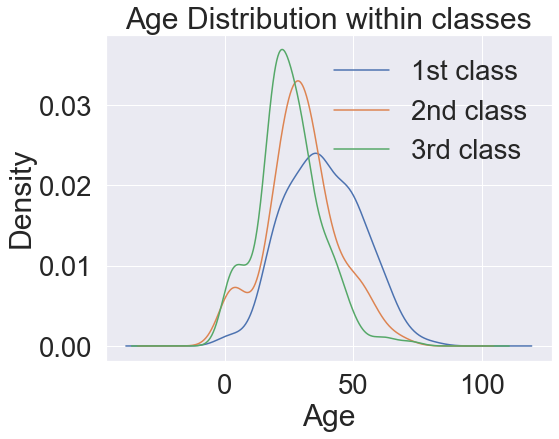

In [51]:
# Age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class','2nd class','3rd class'])

In [52]:
# class가 높을수록 나이 많은 사람의 비중이 커짐.
# 나이대가 변하면서 생존률이 어떻게 되는지 보고자 한다.
# 나이 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 본다.

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.02, 'Survival rate change depending on range of Age')

Text(0, 0.5, 'Survival rate')

Text(0.5, 0, 'Range of Age(0~x)')

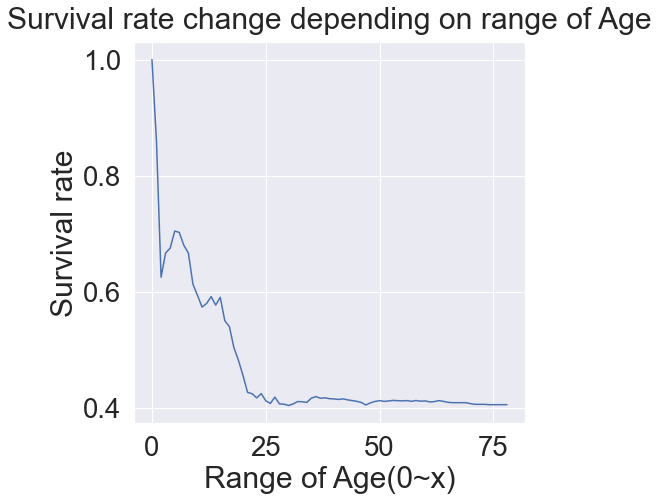

In [56]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

In [57]:
# 보다시피 나이가 어릴수록 생존률이 확실히 높다.
# 우리는 나이가 중요한 feature로 쓰일 수 있음을 확인했다.

### Pclass, Sex, Age

In [58]:
# 지금까지 본 Sex,Pclass,Age,Survived 모두에 대해서 보고 싶은데, 이를 쉽게 그려주는 것이 seaborn의 violinplot이다.
# x축은 우리가 나눠서 보고싶어하는 case를, y축은 보고 싶어하는 distribution(Age)이다.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

Text(0.5, 1.0, 'pclass and age vs survived')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

Text(0.5, 1.0, 'sex and age vs survived')

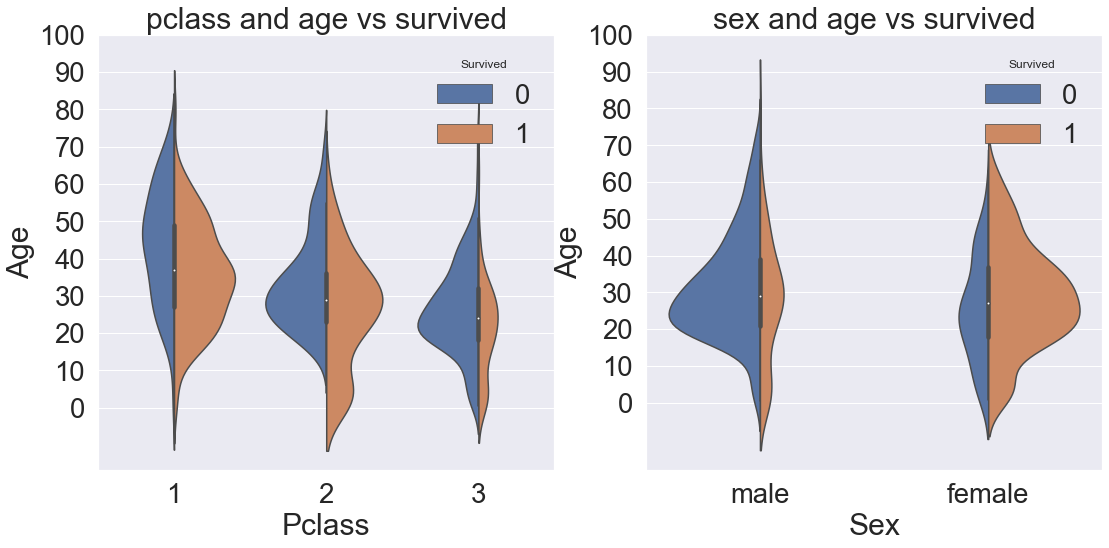

In [60]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[0])
ax[0].set_title('pclass and age vs survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('sex and age vs survived')
ax[1].set_yticks(range(0,110,10))

In [61]:
# 왼쪽 그림은 Pclass별로 Age의 Distribution이 어떻게 다른지, 그에 따른 생존 여부의 그래프.
# 오른쪽 그림은 Sex별 Age의 Distribution.
# 생존만 보면, 모든 클래스에서 나이가 어릴수록 생존을 많이 했다.
# 오른쪽 그림에서 보면, 명확히 여자의 생존률이 높다.
# 여성과 아이를 먼저 챙긴것을 볼 수 있다.

### Embarked

In [62]:
# Embarked는 탑승한 항구를 나타낸다.

<AxesSubplot:xlabel='Embarked'>

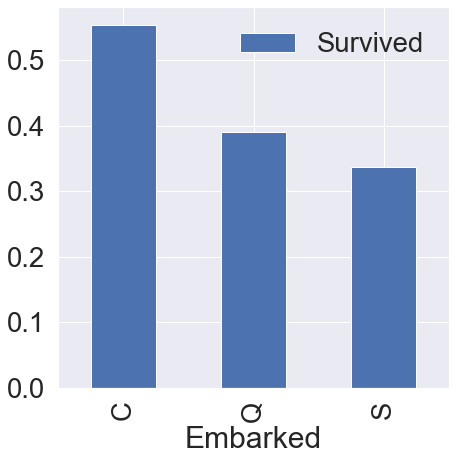

In [63]:
f,ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(
    by='Survived',ascending=False).plot.bar(ax=ax)

In [64]:
# 보다시피, 조금의 차이는 있지만 생존률은 비슷한듯 보인다. 그래도 C가 제일 높다.
# 모델에 얼마나 큰 영향을 미칠지는 모르지만, 그래도 사용한다.
# 사실 모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있다.
# 이는 추후에 모델을 만들고 난 다음 살펴볼 것이다.
# 다른 feature로 split하여 한번 살펴볼 수 있다.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

Text(0.5, 1.0, '(1) No. Of Passengers Boarded')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

Text(0.5, 1.0, '(2) Male-Female Split for Embarked')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

Text(0.5, 1.0, '(3) Embarked vs Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

Text(0.5, 1.0, '(4) Embarked vs Pclass')

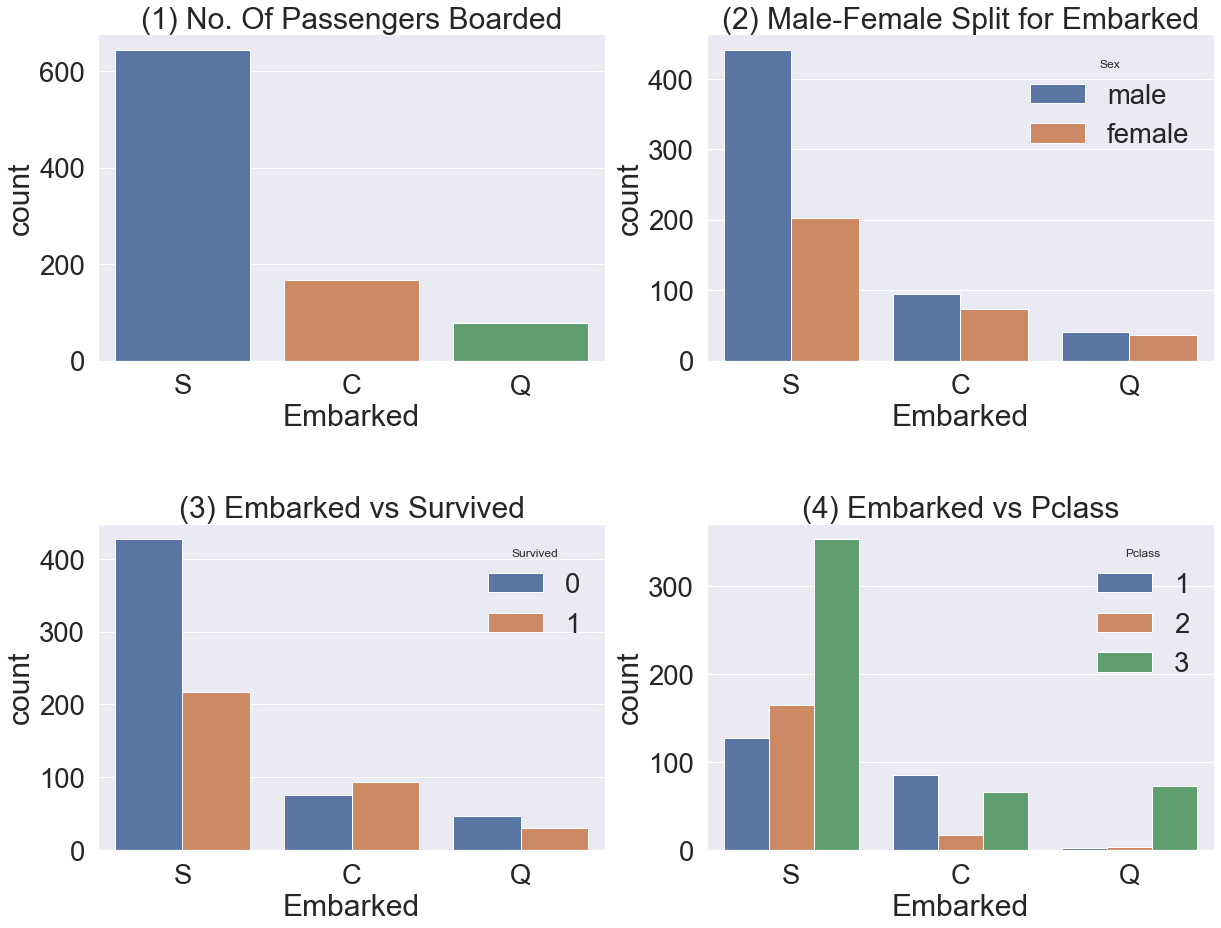

In [65]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)

In [66]:
# figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했다.
# figure(2) - C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많다.
# figure(3) - 생존확률이 S인 경우 많이 낮은걸 볼 수 있다. (이전 그래프에서 봤었다)
# figure(4) - Class로 Split해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇다.
#             S는 3rd class가 많아서 생존확률이 낮게 나온다.

### Family - Sibsp(형제 자매) + Parch(부모, 자녀)

In [67]:
# Sibsp와 Parch를 합해서 Family 변수를 만들 수 있다.

In [68]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자기 자신을 포함한다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자기 자신을 포함한다.

In [69]:
print('Maximum size of Family:',df_train['FamilySize'].max())
print('Minimum size of Family:',df_train['FamilySize'].min())

Maximum size of Family: 11
Minimum size of Family: 1


<AxesSubplot:xlabel='FamilySize', ylabel='count'>

Text(0.5, 1.02, '(1) No. Of Passengers Boarded')

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

Text(0.5, 1.02, '(2) Survived countplot depending on FamilySize')

<AxesSubplot:xlabel='FamilySize'>

Text(0.5, 1.02, '(3) Survived rate depending on FamilySize')

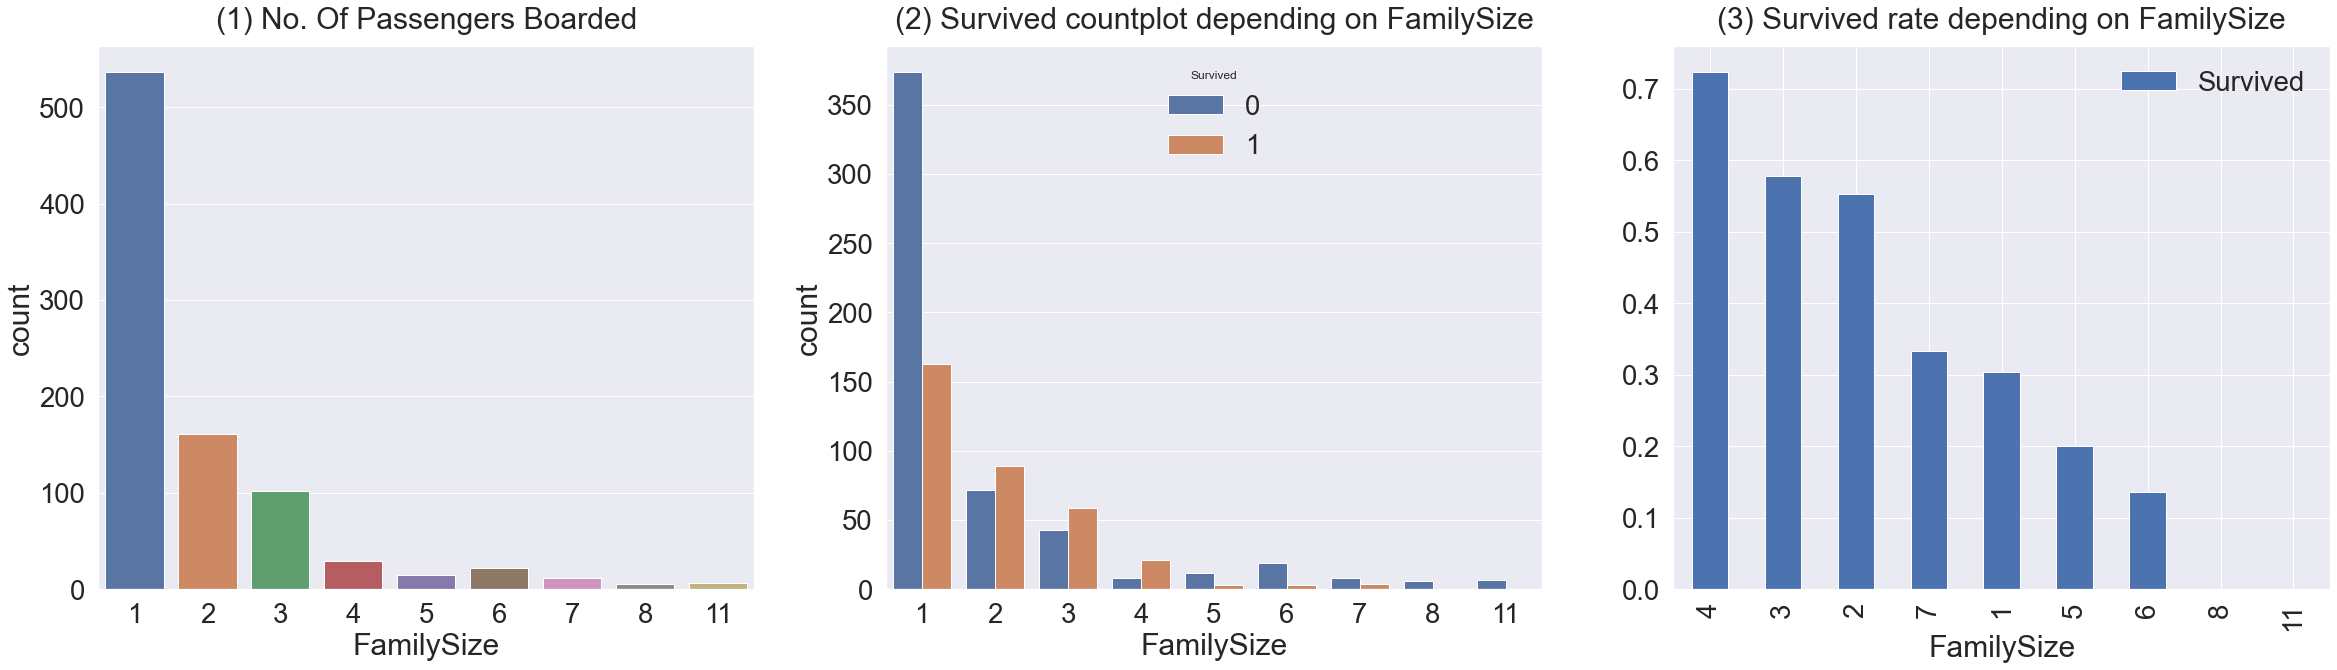

In [70]:
f,ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded',y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',y=1.02)

plt.subplots_adjust(wspace=0.2,hspace=0.5)

In [71]:
# figure(1) - 가족 크기가 1~11까지 있음을 볼 수 있다.
# figure(2),(3) - 가족 크기에 따른 생존비교이다. 가족이 4명인 경우 가장 생존 확률이 높다.
# 가족 수가 많아질수록 생존확률이 낮아진다.
# 가족 수가 너무 작거나, 너무 큰 경우에도 생존 확률이 작다. 3~4명 선에서의 생존 확률이 가장 높은것을 확인할 수 있다.

### Fare

In [72]:
# Fare는 탑승요금이며, continuous feature이다.

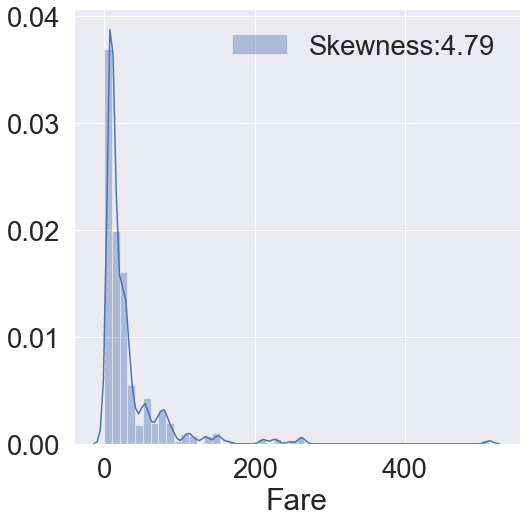

In [73]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label='Skewness:{:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

In [74]:
# 보다시피 Fare의 Distribution이 매우 비대칭인것을 볼 수 있다. - High skewness.
# 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수 있다.
# 몇개 없는 Outlier에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있다.
# Outlier의 영향을 줄이기 위해 Fare에 log를 취한다.
# 여기서 우리는 pandas의 유용한 기능을 사용한다. dataframe의 특정 columns에 공통된 작업, 함수를 적용하고자 한다면,
# 아래의 map 또는 apply를 사용하면 매우 손쉽게 적용할 수 있다.
# 우리가 원하는 것은 Fare columns의 데이터 모두에 log를 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는
# 함수를 map에 인수로 넣어주면, Fare columns에 그대로 적용이 된다. 매우 유용한 기능이니 숙지하면 좋다.

In [76]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean() # test set에 있는 nan value를 평균값으로 치환한다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

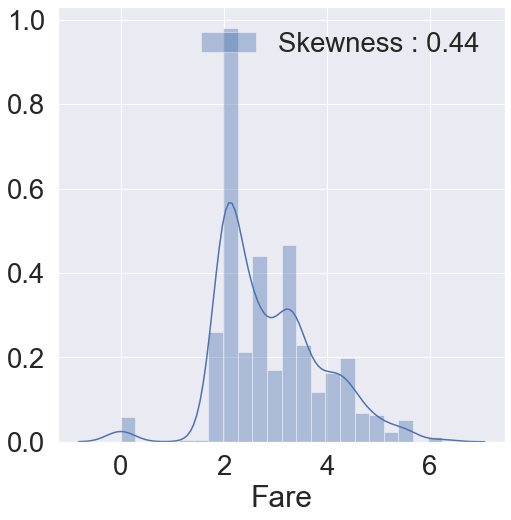

In [77]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

In [78]:
# log를 취하니 비대칭성이 많이 사라진것을 볼 수 있다.
# 우리는 이런 작업을 통해 모델이 좀 더 좋은 성능을 내도록 할 수 있다.
# 방금 한 것은 feature engineering에 들어가는 부분인데, 여기서 작업을 했다.
# 모델의 학습을 위해, 그리고 그 모델의 성능을 높이기 위해 Feature들에 여러 조작을 가하거나,
# 새로운 feature를 추가하는 것을 feature engineering이라고 하는데, 우리는 이제 그것을 살펴볼 것이다.

### Cabin

In [79]:
# 이 Feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않다.
# 그러므로 우리가 세우려는 모델이 포함시키지 않는다.

In [80]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### Ticket

In [81]:
# 이 feature는 NaN이 없다. 일단 string data이므로 우리가 어떤 작업을 해주어야  실제 모델이 사용할 수 있는데,
# 이를 위해서는 사실 아이디어가 필요하다.

In [82]:
df_train['Ticket'].value_counts()

CA. 2343    7
347082      7
1601        7
347088      6
CA 2144     6
           ..
PC 17476    1
370376      1
347083      1
350052      1
315097      1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
# 보다시피 ticket number는 매우 다양하다. 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있나?